# Data Preprocessing
**<font color="red">Code:Load Dataset</font>**

In [4212]:
import pandas as pd
import numpy as np
from sklearn import *
from scipy import stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None) # show all col without hiding 
pd.set_option('display.max_rows', None) 

In [4213]:
# headers
flowVelocity_4Paths = [
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4'
]
speedOfSound_4Paths = [
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4'
]
signalStrength_4Paths = [
    'Signal Strength P1T', 'Signal Strength P1R', 'Signal Strength P2T',
    'Signal Strength P2R', 'Signal Strength P2T', 'Signal Strength P2R',
    'Signal Strength P2T', 'Signal Strength P2R'
]
turbulence_4Paths = [
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4'
]
signalQuality_4Paths = [
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R'
]
gain_4Paths = [
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R'
]
transitTime_4Paths = [
    'Transit Time P1T', 'Transit Time P2R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R'
]

flowVelocity_8Paths = [
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Flow Velocity P5', 'Flow Velocity P6',
    'Flow Velocity P7', 'Flow Velocity P8'
]
speedOfSound_8Paths = [
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Speed of Sound P5', 'Speed of Sound P6',
    'Speed of Sound P7', 'Speed of Sound P8'
]
gain_8Paths = [
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Gain P5T', 'Gain P5R', 'Gain P6T', 'Gain P6R',
    'Gain P7T', 'Gain P7R', 'Gain P8T', 'Gain P8R'
]

col_name_meterA = [
    'Flatness ratio', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Flow Velocity P5', 'Flow Velocity P6', 'Flow Velocity P7',
    'Flow Velocity P8', 'Speed of Sound P1', 'Speed of Sound P2',
    'Speed of Sound P3', 'Speed of Sound P4', 'Speed of Sound P5',
    'Speed of Sound P6', 'Speed of Sound P7', 'Speed of Sound P8',
    'Average Speed of Sound', 'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R',
    'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R', 'Gain P5T', 'Gain P5R',
    'Gain P6T', 'Gain P6R', 'Gain P7T', 'Gain P7R', 'Gain P8T', 'Gain P8R',
    'Class'
]

col_name_meterB = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
    'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
    'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
    'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
    'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
    'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
    'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
    'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
    'Transit Time P2T', 'Transit Time P2R', 'Transit Time P3T',
    'Transit Time P3R', 'Transit Time P4T', 'Transit Time P4R', 'Class'
]

col_name_meterD = [
    'Profile factor', 'Symmetry', 'Crossflow', 'Flow Velocity P1',
    'Flow Velocity P2', 'Flow Velocity P3', 'Flow Velocity P4',
    'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Signal Strength P1T', 'Signal Strength P1R',
    'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
    'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
    'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R', 'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
    'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R', 'Class'
]

df_meterA = pd.read_csv('dataset/Meter A', header=None, sep='\t')
df_meterA.columns = col_name_meterA

df_meterB = pd.read_csv('dataset/Meter B', header=None, sep='\t')
df_meterB.columns = col_name_meterB

df_meterD = pd.read_csv('dataset/Meter D', header=None, sep='\t')
df_meterD.columns = col_name_meterD

# df_meterA
df_meterB
# df_meterD




,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
0,1.18509,1.02813,1.01648,0.15000,2.19574,2.54094,2.51196,2.08789,2.39444,1483.86983,1486.38217,1485.37206,1484.98900,1485.15322,5260.65556,5067.58889,4977.82222,4984.07778,5170.31111,5200.20556,4111.52778,4291.85000,9.03894,4.42683,4.50456,9.24122,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.10707,84.00310,120.33878,120.14424,120.37177,120.17908,84.01905,83.91997,1
1,1.19181,1.03375,1.01941,0.21700,2.19247,2.54659,2.51674,2.07571,2.39609,1483.74739,1486.25922,1485.25033,1484.86706,1485.03072,5256.22778,5065.40000,4978.02222,4981.43333,5172.34444,5200.81667,4107.14444,4286.32778,9.03017,4.28400,4.59750,9.16644,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.11412,84.00997,120.34909,120.15389,120.38170,120.18880,84.02561,83.92726,1
2,1.18198,1.02809,1.02099,0.08890,3.24667,3.73838,3.71522,3.07936,3.52352,1483.77706,1486.28822,1485.28100,1484.89889,1485.06111,5278.55000,5002.90000,4971.04444,4958.05556,5146.37778,5179.37222,4039.27222,4302.88333,9.78072,4.61200,4.54478,10.23117,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13749,83.98334,120.39245,120.10621,120.42542,120.14058,84.04781,83.90159,1
3,1.18276,1.02878,1.02107,0.11700,3.24449,3.74186,3.71884,3.08040,3.52593,1483.84744,1486.35717,1485.35044,1484.97017,1485.13128,5276.14444,4994.79444,4973.30556,4956.30556,5149.92222,5175.68889,4036.35556,4297.37778,9.74939,4.83533,4.74928,10.94506,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13349,83.97941,120.38703,120.10044,120.41988,120.13493,84.04372,83.89760,1
4,1.18227,1.02892,1.02135,0.02220,3.24594,3.74222,3.71546,3.08095,3.52513,1483.81906,1486.32844,1485.32050,1484.94433,1485.10328,5272.71667,4993.56111,4969.87778,4952.24444,5147.42222,5174.01111,4035.33889,4297.57222,9.60233,4.47989,4.71683,9.98406,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13535,83.98081,120.38936,120.10280,120.42205,120.13747,84.04535,83.89896,1
5,1.17796,1.03091,1.01945,0.01670,3.25534,3.74559,3.70766,3.09032,3.52609,1483.78006,1486.28967,1485.28233,1484.90367,1485.06389,5270.02222,4994.74444,4968.26111,4951.88333,5144.10000,5173.15556,4036.14444,4298.97778,10.12528,4.77900,4.78856,10.83233,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,100.00000,52.50000,52.50000,52.90000,52.90000,50.70000,50.70000,49.80000,49.80000,84.13760,83.98294,120.39268,120.10581,120.42503,120.14079,84.04772,83.90111,1
6,1.18708,1.02954,1.02076,0.21700,3.23333,3.74287,3.71966,3.07147,3.52384,1483.73911,1486.24850,1485.24100,1484.86511,1485.02344,5266.19444,4994.69444,4968.84444,4955.65556,5142.30556,5174.22222,4034.08333,4300.10556,9.70706,4.817

# Meter B

# 1) Identity Outlier Data in the attributes
view col of all box blot

<AxesSubplot:>

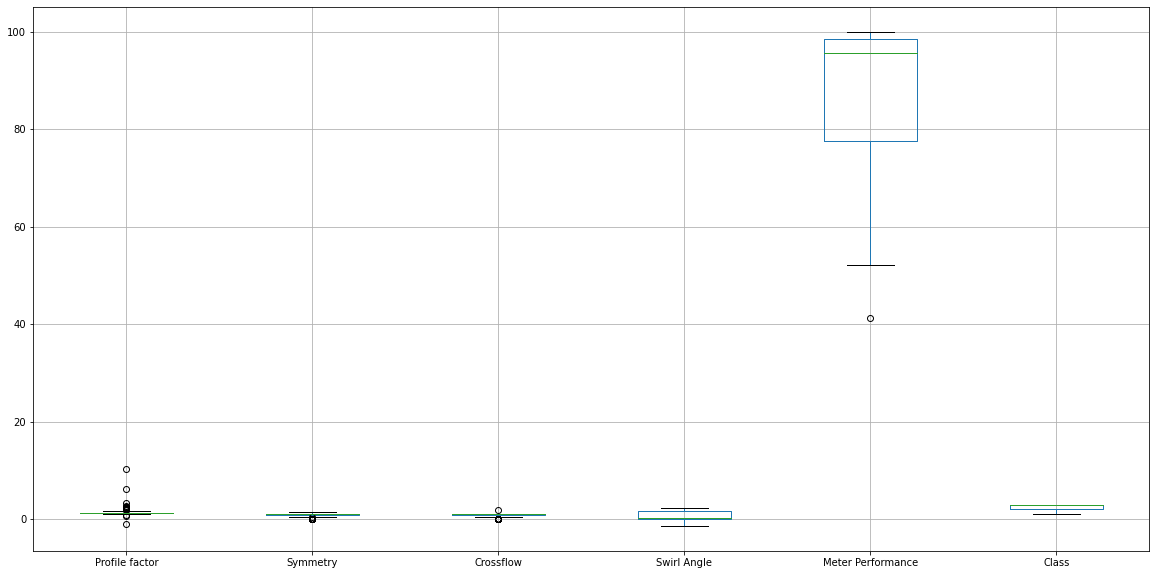

In [4214]:
col_name_list1= [
    'Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle', 'Meter Performance' , 'Class'
]

df_meterB[col_name_list1].boxplot(figsize=(20,10))

<AxesSubplot:>

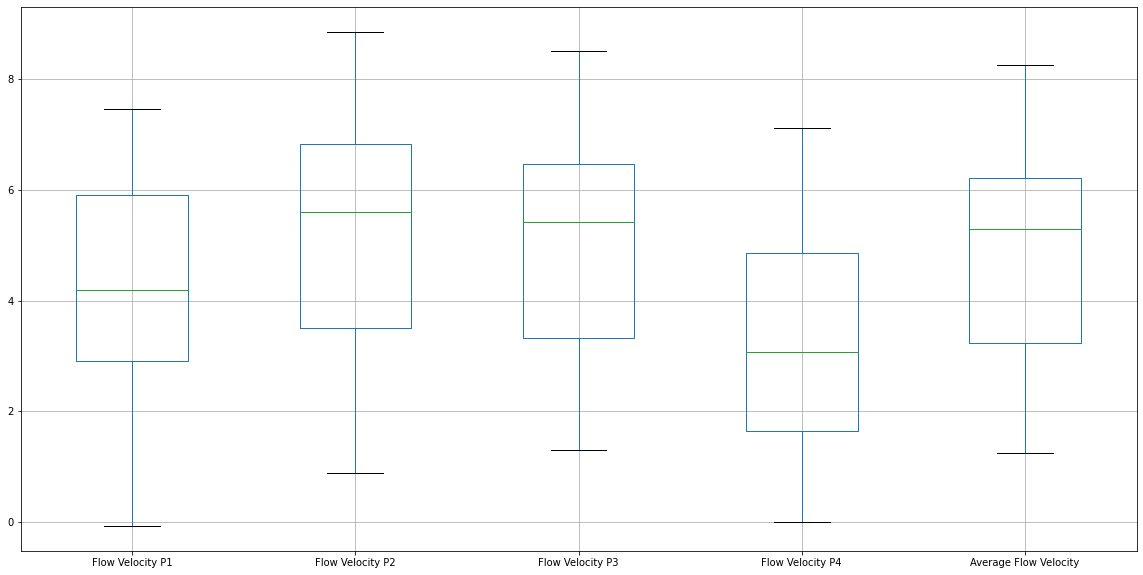

In [4215]:
col_name_list2= [
    'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
    'Flow Velocity P4','Average Flow Velocity'
]
df_meterB[col_name_list2].boxplot(figsize=(20,10))

<AxesSubplot:>

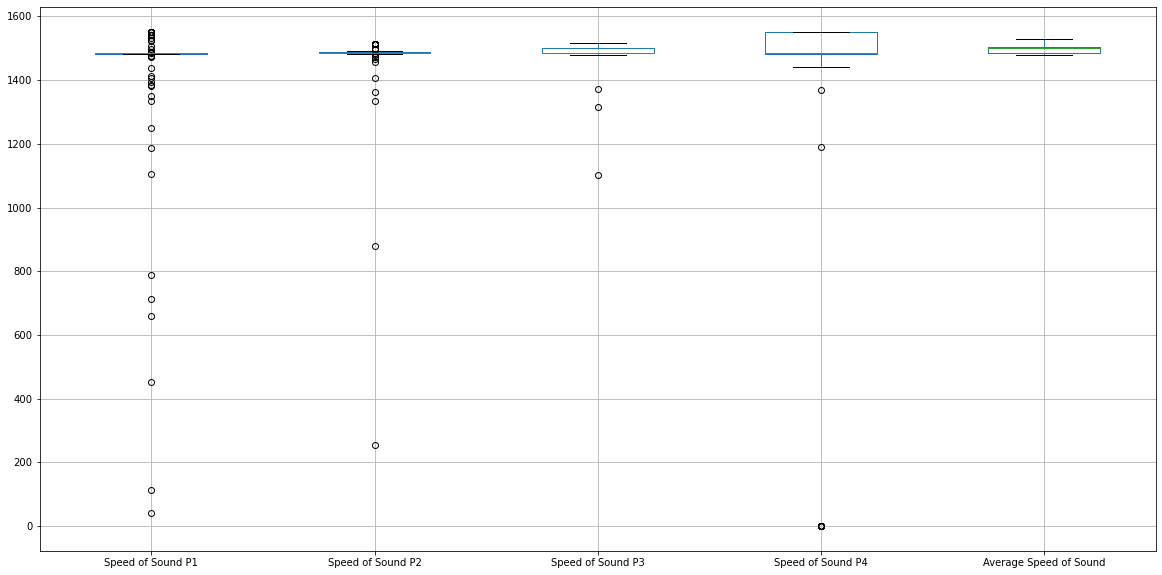

In [4216]:
col_name_list3= [
     'Speed of Sound P1', 'Speed of Sound P2', 'Speed of Sound P3',
    'Speed of Sound P4', 'Average Speed of Sound',
]

df_meterB[col_name_list3].boxplot(figsize=(20,10))

<AxesSubplot:>

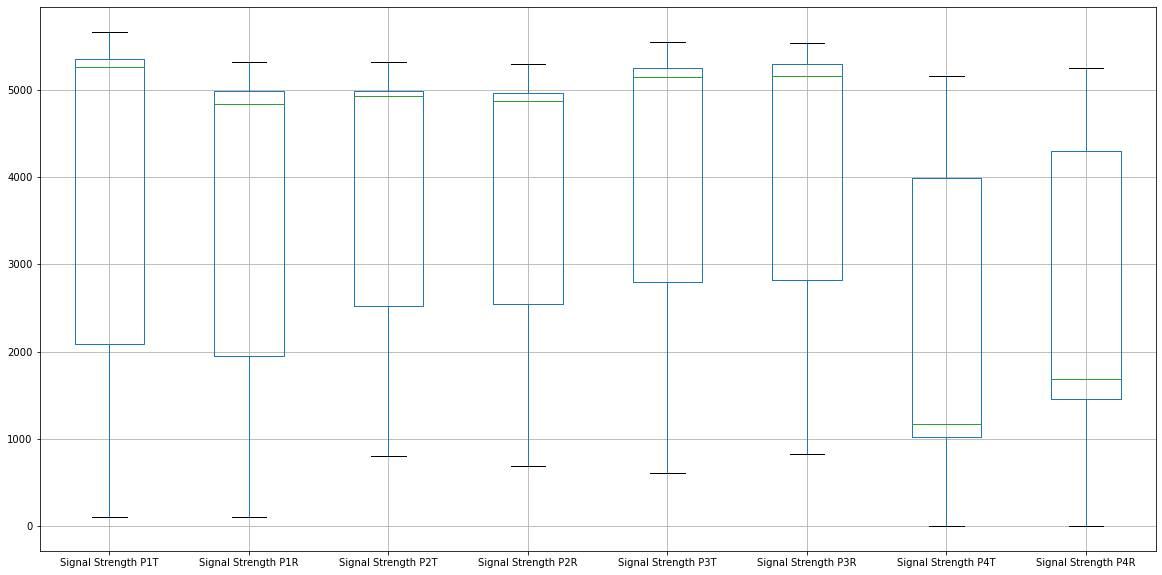

In [4217]:
col_name_list4= [
     'Signal Strength P1T', 'Signal Strength P1R', 'Signal Strength P2T',
    'Signal Strength P2R', 'Signal Strength P3T', 'Signal Strength P3R',
    'Signal Strength P4T', 'Signal Strength P4R'
]
df_meterB[col_name_list4].boxplot(figsize=(20,10))

<AxesSubplot:>

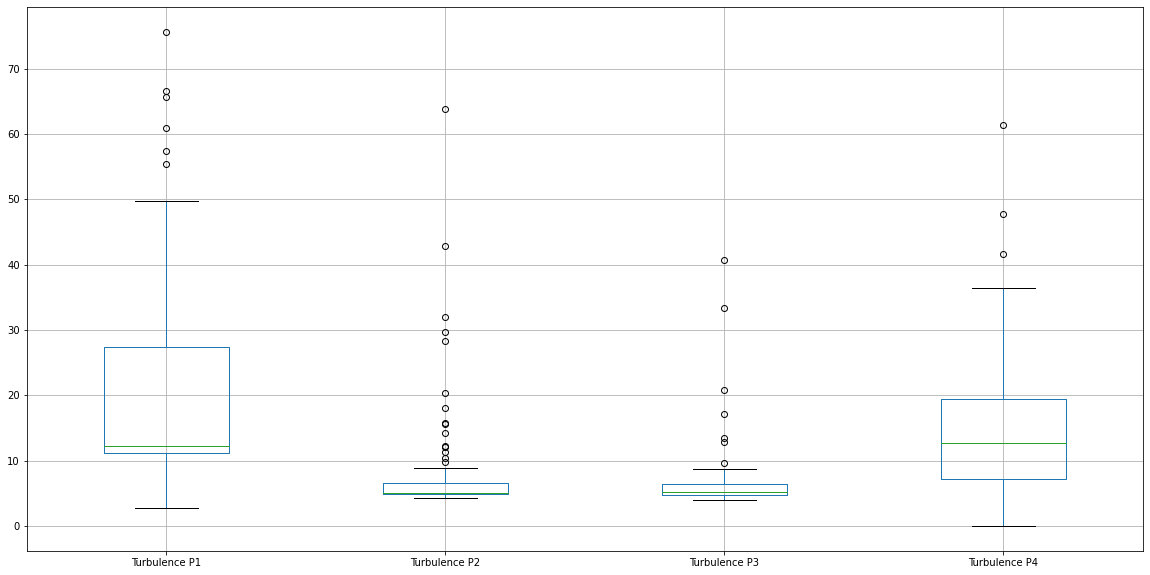

In [4218]:
col_name_list5= [
   'Turbulence P1',
    'Turbulence P2', 'Turbulence P3', 'Turbulence P4'
]
df_meterB[col_name_list5].boxplot(figsize=(20,10))

<AxesSubplot:>

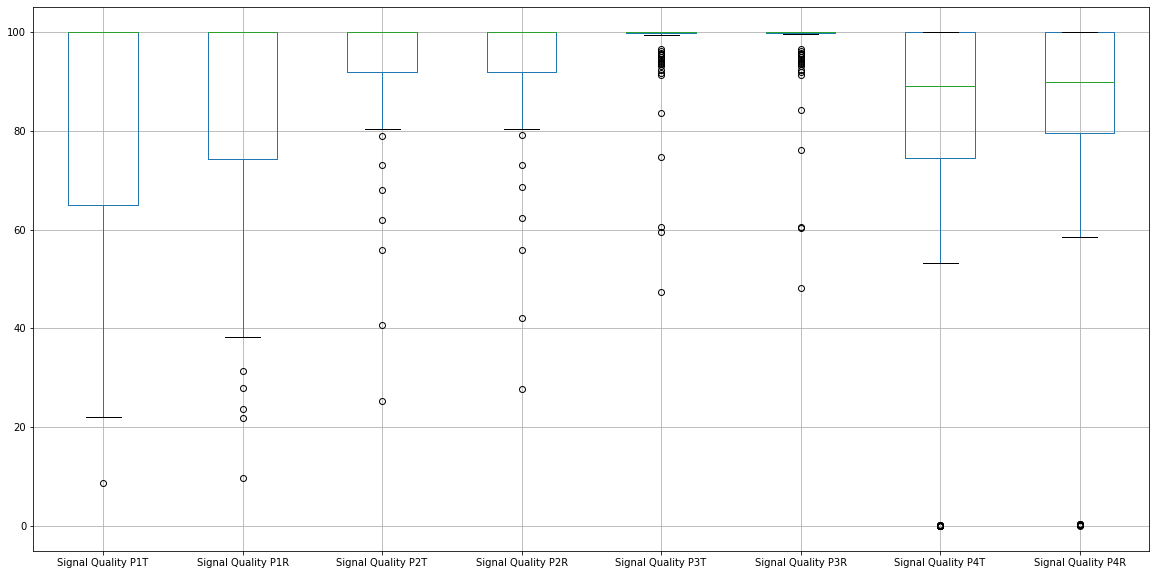

In [4219]:

col_name_list6= [
       'Signal Quality P1T', 'Signal Quality P1R', 'Signal Quality P2T',
    'Signal Quality P2R', 'Signal Quality P3T', 'Signal Quality P3R',
    'Signal Quality P4T', 'Signal Quality P4R'
]
df_meterB[col_name_list6].boxplot(figsize=(20,10))

<AxesSubplot:>

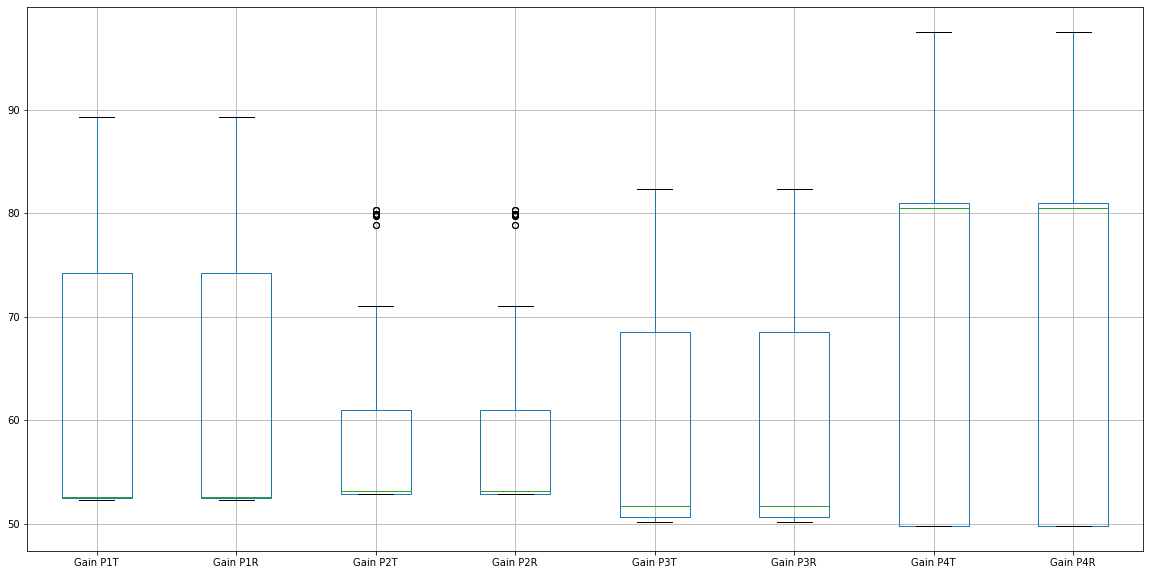

In [4220]:
col_name_list7= [
    'Gain P1T', 'Gain P1R',
    'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R', 'Gain P4T', 'Gain P4R',
]
df_meterB[col_name_list7].boxplot(figsize=(20,10))

<AxesSubplot:>

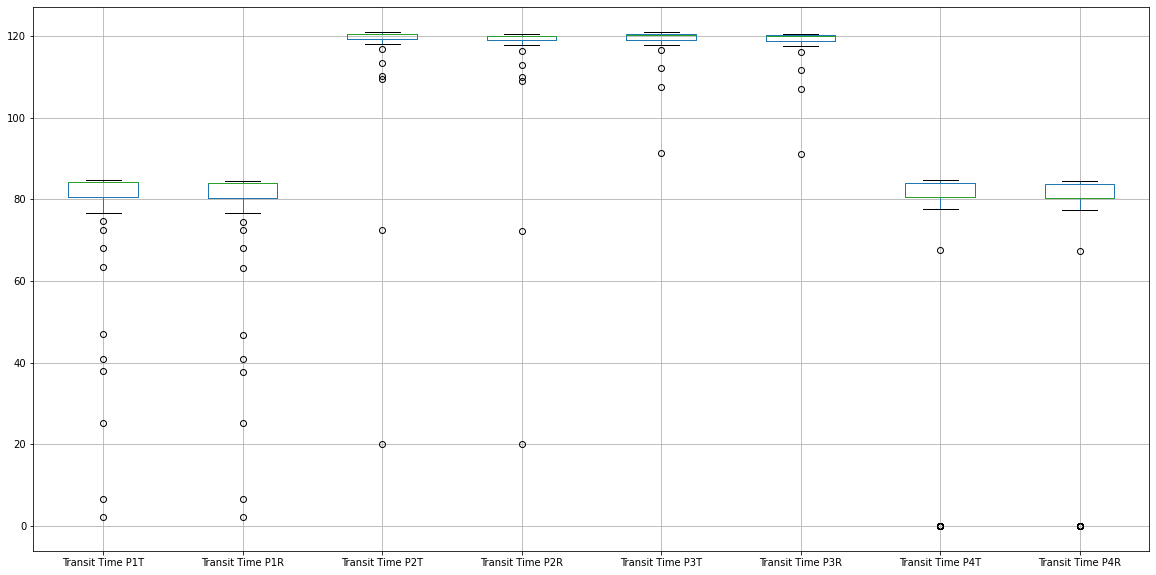

In [4221]:

col_name_list8=[ 'Transit Time P1T', 'Transit Time P1R', 'Transit Time P2T',
    'Transit Time P2R', 'Transit Time P3T', 'Transit Time P3R',
    'Transit Time P4T', 'Transit Time P4R']

df_meterB[col_name_list8].boxplot(figsize=(20,10))

# 2) Check missing value
Check missing value and drop row with missing value. Meter B no missing value or row drop



In [4222]:
# count the rows and columns in a DataFrame
print("\nNumber of rows and column in our DataFrame = ",df_meterB.shape)
res = df_meterB.notnull()
print("\nDataFrame displaying False for Null (NaN) value = \n",res)

df_meterB = df_meterB.dropna()
print("\nDataFrame after removing null values...\n",df_meterB)
print("\n(Updated) Number of rows and column in our DataFrame = ",df_meterB.shape)


Number of rows and column in our DataFrame =  (92, 52)

DataFrame displaying False for Null (NaN) value = 
     Profile factor  Symmetry  Crossflow  Swirl Angle  Flow Velocity P1  \
0             True      True       True         True              True   
1             True      True       True         True              True   
2             True      True       True         True              True   
3             True      True       True         True              True   
4             True      True       True         True              True   
5             True      True       True         True              True   
6             True      True       True         True              True   
7             True      True       True         True              True   
8             True      True       True         True              True   
9             True      True       True         True              True   
10            True      True       True         True              True   
11 

## Check for duplicate data

In [4223]:
dups = df_meterB.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


# 3) Check for 0 in the dataset

In [4224]:
# Count number of zeros in all columns of Dataframe
for column_name in df_meterB.columns:
    column = df_meterB[column_name]
    # Get the count of Zeros in each column 
    count = (column == 0).sum()
    print(f'Count of zeros in column: {column_name} is : {count}')

Count of zeros in column: Profile factor is : 0
Count of zeros in column: Symmetry is : 15
Count of zeros in column: Crossflow is : 15
Count of zeros in column: Swirl Angle is : 15
Count of zeros in column: Flow Velocity P1 is : 0
Count of zeros in column: Flow Velocity P2 is : 0
Count of zeros in column: Flow Velocity P3 is : 0
Count of zeros in column: Flow Velocity P4 is : 15
Count of zeros in column: Average Flow Velocity is : 0
Count of zeros in column: Speed of Sound P1 is : 0
Count of zeros in column: Speed of Sound P2 is : 0
Count of zeros in column: Speed of Sound P3 is : 0
Count of zeros in column: Speed of Sound P4 is : 15
Count of zeros in column: Average Speed of Sound is : 0
Count of zeros in column: Signal Strength P1T is : 0
Count of zeros in column: Signal Strength P1R is : 0
Count of zeros in column: Signal Strength P2T is : 0
Count of zeros in column: Signal Strength P2R is : 0
Count of zeros in column: Signal Strength P3T is : 0
Count of zeros in column: Signal Stre

# 4) 3 Path to handle 0 values: 
1. Remove whole row with 0 (df_remove_meterB)
- 57 rows remained
2. Replace 0 with median (df_median_meterB)
- 58 rows remained

Steps: 
- Select Profile Factor 
- View Box plot (IQT), Line graph
    - The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or “far outs” when described in the context of box and whisker plots.
- Remove outlier with Zscore
    - The further away an observation’s Z-score is from zero, the more unusual it is. A standard cut-off value for finding outliers are Z-scores of +/-3 or further from zero.

## 1st Method: Remove whole row with 0

In [4225]:
print(df_meterB.shape)
df_remove_meterB = df_meterB.replace(0, np.nan)
df_remove_meterB = df_remove_meterB.dropna(how='any', axis=0) # axis = 0(row), = 1(columns)
df_remove_meterB = df_remove_meterB.replace(np.nan, 0)

df_remove_meterB.shape

(92, 52)


(77, 52)

### Boxplot for 1st column (df_remove)

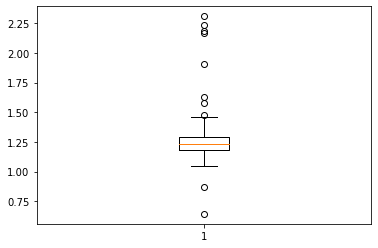

<Figure size 720x504 with 0 Axes>

IQR: 0.11020555599999993 Upper bound: 1.4574972229999998 Lower bound: 1.0166749990000001
The following are the outliers in the boxplot: 21   2.30833
22   0.86628
23   2.23479
24   2.16995
28   0.64294
29   1.47445
30   1.90803
34   2.18176
42   1.62528
66   1.57610
Name: Profile factor, dtype: float64
Number of outliers: 10


(77, 52)

In [4226]:
val_1 = df_remove_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot: {}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))


df_remove_meterB.shape

Remove Outlier

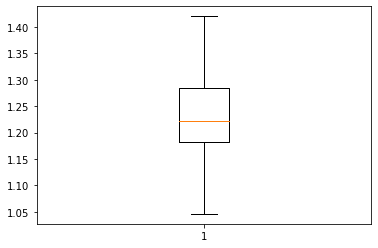

<Figure size 720x504 with 0 Axes>

(66, 52)

In [4227]:
df_remove_meterB.drop(df_remove_meterB.index[[21,22,23,24,25,28,29,30,34,42,66]],inplace=True)

val_1 = df_remove_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

df_remove_meterB.shape


### Line graph for 1st column (df_median)

81.37699444299999


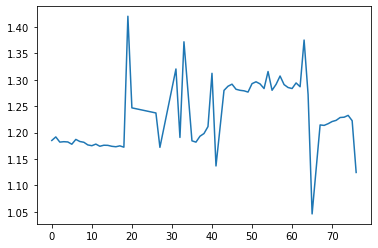

<Figure size 720x504 with 0 Axes>

In [4228]:
val_1 = df_remove_meterB['Profile factor']
print(val_1.sum())
val_1 = df_remove_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

### Zscore for 1st column (df_remove)
- 66 to 58 =  14 rows removed 

In [4229]:
# print(df_remove_meterB.shape)
z_scores = stats.zscore(df_remove_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_remove_meterB = df_remove_meterB[filtered_entries]

df_remove_meterB.shape

(57, 52)

## 2nd Method: Replace 0 with median

In [4230]:
print(df_meterB.shape)
df_median_meterB = df_meterB
for col_name in df_meterB.columns:
    df_median_meterB.loc[df_median_meterB[col_name] == 0, str(col_name)] = df_median_meterB[col_name].median()
df_median_meterB.shape

(92, 52)


(92, 52)

### Boxplot for 1st column (df_median)

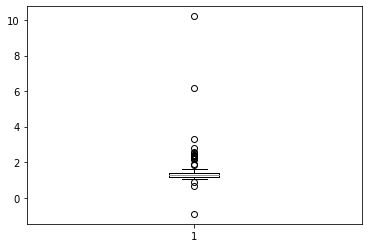

<Figure size 720x504 with 0 Axes>

IQR: 0.19005833324999988 Upper bound: 1.6577847218749997 Lower bound: 0.8975513888750003
The following are the outliers in the boxplot:21    2.30833
22    0.86628
23    2.23479
24    2.16995
28    0.64294
30    1.90803
34    2.18176
79    1.84874
80    2.32609
81    2.39119
82    6.16316
83    2.40243
84    2.52812
85    2.79266
86   10.20850
87    2.41811
88    3.29042
89    2.60104
90    2.33680
91   -0.90917
Name: Profile factor, dtype: float64
Number of outliers: 20


In [4231]:
val_1 = df_median_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

# finding the 1st quartile
q1 = np.quantile(val_1, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(val_1, 0.75)
med = np.median(val_1)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print('IQR:',iqr, 'Upper bound:',upper_bound, 'Lower bound:',lower_bound)

outliers = val_1[(val_1 <= lower_bound) | (val_1 >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
print("Number of outliers: "+ str(len(outliers)))

## Remove outlier

(92, 52)


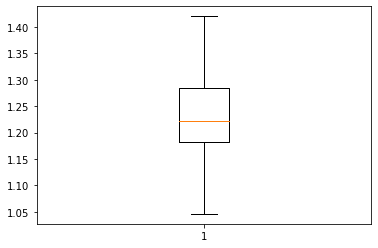

<Figure size 720x504 with 0 Axes>

(68, 52)

In [4232]:

print(df_meterB.shape)
df_median_meterB.drop(df_median_meterB.index[[21,22,23,24,28,28,30,34,79,80,81,82,83,84,85,86,87,88,89,90,91,25,29,42,66]],inplace=True)

val_1 = df_median_meterB['Profile factor']
plt.boxplot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()
df_median_meterB.shape



### Line graph for 1st column (df_median)

83.77304955999999


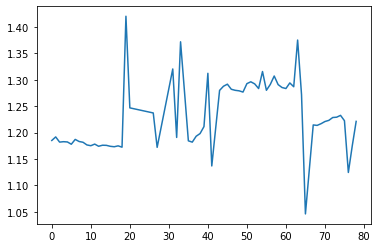

<Figure size 720x504 with 0 Axes>

In [4233]:
val_1 = df_median_meterB['Profile factor']
print(val_1.sum())
val_1 = df_median_meterB['Profile factor']
plt.plot(val_1)
fig = plt.figure(figsize =(10, 7))
plt.show()

### Zscore for 1st column (df_median)

68 to 58 = 10 rows removed

In [4234]:
z_scores = stats.zscore(df_median_meterB)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_median_meterB = df_median_meterB[filtered_entries]

# reset index value
df_median_meterB.shape

(58, 52)

# 5) PCA 
Principal component analysis (PCA) is a classical method for reducing the number of 
attributes in the data by projecting the data from its original high-dimensional space 
into a lower-dimensional space. The new attributes (also known as components) created by 
PCA have the following properties: 

(1) they are linear combinations of the original attributes, 

(2) they are orthogonal (perpendicular) to each other 

(3) they capture the maximum amount of variation in the data.  

## Normalize data
PCA performs best with a normalized feature set. We will perform standard scalar normalization to normalize our feature set

In [4235]:
from sklearn.preprocessing import StandardScaler

dataset = df_median_meterB

print(dataset.shape)

scaler = StandardScaler()
X = scaler.fit_transform(dataset)


(58, 52)


## Store projected values of the into a dataframe called projected 1

In [4236]:
from sklearn.decomposition import PCA

pca = PCA(.99)
pca.fit(dataset)
X_pca = pca.fit_transform(X) # make model learn prepare the eigenvector/values


projected_1 = pd.DataFrame(X_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']) 
projected_1


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.66588,-3.95998,0.05628,-0.30865,1.36815,-1.72022,-0.74602,-0.26265,0.00121
1,2.59960,-3.91391,0.05925,-0.41685,1.36501,-1.81238,-0.71434,-0.29491,0.09906
2,2.33700,-3.59809,0.97260,-0.09183,0.55122,-1.37611,-0.44937,-0.11186,-0.02043
3,2.33168,-3.47334,1.00200,-0.05651,0.53793,-1.32315,-0.56928,-0.20365,-0.02620
4,2.34866,-3.57447,1.00827,-0.02564,0.55881,-1.36345,-0.45958,-0.16785,-0.02546
5,2.36213,-3.47953,1.06069,-0.01943,0.56271,-1.40650,-0.53468,-0.17310,-0.06953
6,2.32163,-3.52008,0.95070,-0.17363,0.52911,-1.37724,-0.50710,-0.14029,0.09082
7,2.31701,-3.48380,1.00375,-0.13263,0.53877,-1.39716,-0.50716,-0.17475,0.06029
8,2.09276,-3.24973,1.59321,0.07729,-0.05422,-1.07880,-0.32062,-0.06929,0.03930
9,1.84698,-2.91853,2.44663,0.39581,-0.82320,-0.72388,-0.11993,0.02206,-0.03050


## Plot Cummulative variances with individual variance
- add as many pc components possible closest to 100%

Result: 4 PC components is sufficent to represent the entire variance of the data. 3 PC is too low 
while 5 PC is too much

Explained variance ratio: [20.53354482 11.46677808  7.77980506  5.72956937  2.97880947  2.04732291
  1.12851862  0.59554968  0.21684353]
Total cummulative sum: 52.47674154206258
9


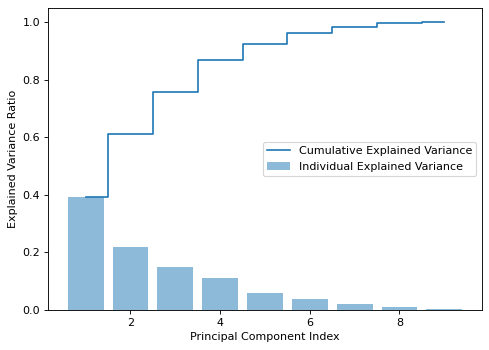

In [4237]:
# figure size
figure(figsize=(7, 5), dpi=80)

# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print(f"Explained variance ratio: {pca.explained_variance_}")
print(f"Total cummulative sum: {tot}")
var_exp = [(i / tot) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(var_exp))

# plot explained variances
plt.bar(range(1,10), var_exp, alpha=0.5,
        align='center', label='Individual Explained Variance')
plt.step(range(1,10), cum_var_exp, where='mid',
         label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.show()

## Plot explained variance ratio

Text(0, 0.5, 'Cumulative Varience')

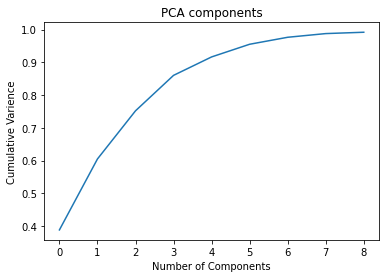

In [4238]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Varience')

## Plot scatter plot

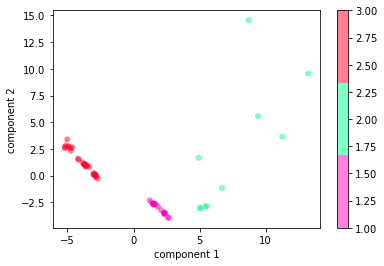

In [4239]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=dataset['Class'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow_r', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# 7) Feature Importance
 
The importance of each feature is reflected by the magnitude of the corresponding values in the eigenvectors (higher magnitude — higher importance).

we can conclude that feature 1, 3 and 4 are the most important for PC1. Similarly, we can state that feature 2 and then 1 are the most important for PC2.

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

## PCA

In [4240]:
df_pca = pd.DataFrame(abs(pca.components_),columns=col_name_meterB)
df_pca = df_pca.set_axis(['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
df_pca

,Profile factor,Symmetry,Crossflow,Swirl Angle,Flow Velocity P1,Flow Velocity P2,Flow Velocity P3,Flow Velocity P4,Average Flow Velocity,Speed of Sound P1,Speed of Sound P2,Speed of Sound P3,Speed of Sound P4,Average Speed of Sound,Signal Strength P1T,Signal Strength P1R,Signal Strength P2T,Signal Strength P2R,Signal Strength P3T,Signal Strength P3R,Signal Strength P4T,Signal Strength P4R,Turbulence P1,Turbulence P2,Turbulence P3,Turbulence P4,Meter Performance,Signal Quality P1T,Signal Quality P1R,Signal Quality P2T,Signal Quality P2R,Signal Quality P3T,Signal Quality P3R,Signal Quality P4T,Signal Quality P4R,Gain P1T,Gain P1R,Gain P2T,Gain P2R,Gain P3T,Gain P3R,Gain P4T,Gain P4R,Transit Time P1T,Transit Time P1R,Transit Time P2T,Transit Time P2R,Transit Time P3T,Transit Time P3R,Transit Time P4T,Transit Time P4R,Class
PC1,0.06335,0.20408,0.18258,0.12949,0.10953,0.10983,0.10218,0.07465,0.10286,0.12608,0.07687,0.08698,0.19064,0.19422,0.18418,0.18323,0.17012,0.16637,0.09303,0.06580,0.19191,0.18881,0.16744,0.12572,0.02433,0.17687,0.00498,0.15591,0.15597,0.11687,0.11714,0.06574,0.06289,0.17883,0.18493,0.16595,0.16595,0.06293,0.06293,0.11354,0.11354,0.18948,0.18948,0.13390,0.12709,0.10888,0.00021,0.07137,0.09964,0.18941,0.19178,0.14195
PC2,0.13258,0.07724,0.00404,0.10203,0.07965,0.08548,0.07726,0.06498,0.07994,0.13444,0.07559,0.08130,0.10528,0.09374,0.12459,0.13254,0.14554,0.15192,0.18893,0.21443,0.13196,0.13165,0.13708,0.21246,0.24108,0.13196,0.26566,0.17546,0.17584,0.18898,0.18936,0.17909,0.17848,0.13876,0.13797,0.10855,0.10855,0.19764,0.19764,0.11334,0.11334,0.11602,0.11602,0.09499,0.10818,0.09649,0.01610,0.06932,0.09026,0.10381,0.10604,0.16323
PC3,0.19223,0.04279,0.01147,0.13894,0.24430,0.24135,0.25085,0.28122,0.25046,0.15354,0.13253,0.06732,0.11732,0.12180,0.08283,0.05297,0.04660,0.05702,0.18961,0.17174,0.03096,0.05038,0.13056,0.04951,0.16341,0.01819,0.12456,0.09297,0.09234,0.01361,0.01362,0.20405,0.19953,0.06584,0.06988,0.16468,0.16468,0.11590,0.11590,0.03915,0.03915,0.10629,0.10629,0.19758,0.17800,0.21440,0.03594,0.10741,0.02812,0.12384,0.11184,0.16013
PC4,0.21506,0.07428,0.20935,0.24620,0.07424,0.07053,0.04191,0.07974,0.06151,0.00927,0.18629,0.35276,0.06720,0.01481,0.00442,0.02748,0.08571,0.08912,0.03507,0.06271,0.08884,0.09552,0.02206,0.00746,0.08398,0.07845,0.05238,0.01044,0.01060,0.02821,0.02835,0.08442,0.09453,0.10760,0.04460,0.00026,0.00026,0.17948,0.17948,0.29397,0.29397,0.07226,0.07226,0.02433,0.03367,0.09677,0.23685,0.34868,0.34919,0.06822,0.06524,0.06271
PC5,0.13109,0.09248,0.01419,0.05996,0.23957,0.24186,0.25755,0.24533,0.24911,0.26221,0.00840,0.09620,0.00449,0.03718,0.08683,0.04560,0.17160,0.15903,0.07336,0.10542,0.01417,0.01670,0.04778,0.07510,0.02243,0.06592,0.11118,0.14081,0.14012,0.05719,0.05729,0.22870,0.22558,0.01602,0.00094,0.04263,0.04263,0.21431,0.21431,0.11351,0.11351,0.01782,0.01782,0.24493,0.28229,0.12561,0.16142,0.13677,0.05471,0.00926,0.00061,0.07350
PC6,0.03856,0.02176,0.17452,0.11228,0.08655,0.08586,0.10574,0.06825,0.09237,0.17907,0.47687,0.06528,0.06590,0.09761,0.13942,0.16230,0.11647,0.12463,0.03231,0.02162,0.01182,0.03211,0.05617,0.07014,0.05939,0.05912,0.05574,0.07397,0.07379,0.04860,0.04867,0.01691,0.06152,0.00702,0.03207,0.02516,0.02516,0.11209,0.11209,0.16295,0.16295,0.04954,0.04954,0.09583,0.09026,0.29404,0.53922,0.08139,0.04670,0.06541,0.06784,0.15792
PC7,0.02987,0.02861,0.00083,0.05698,0.11041,0.10486,0.10401,0.09460,0.10574,0.02139,0.11895,0.00138,0.01727,0.02405,0.11842,0.14718,0.01915,0.02282,0.21725,0.20909,0.06677,0.08311,0.19497,0.31848,0.17076,0.05723,0.07602,0.07368,0.07260,0.42235,0.42236,0.15965,0.17417,0.06220,0.05939,0.21199,0.21199,0.16372,0.16372,0.05021,0.05021,0.00390,0.00390,0.04206,0.05621,0.13726,0.04618,0.01817,0.01382,0.01960,0.01605,0.05094
PC8,0.30373,0.03375,0.07949,0.00882,0.05879,0.05783,0.05765,0.03065,0.05616,0.17875,0.10298,0.00568,0.01716,0.00822,0.01470,0.03474,0.03015,0.02533,0.29371,0.28636,0.01272,0.02501,0.18073,0.04770,0.21125,0.17368,0.01353,0.10331,

# Data Mining 

# Split Dataset (70/30) vs 80/20 using Random Forest

In [4241]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Class', 1)
y = dataset['Class']

X1 = dataset.drop('Class', 1)
y1 = dataset['Class']

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=0)

/var/folders/7x/1p6my40n6kb5znc18rklfy9h0000gn/T/ipykernel_9286/1547734000.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Class', 1)
/var/folders/7x/1p6my40n6kb5znc18rklfy9h0000gn/T/ipykernel_9286/1547734000.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X1 = dataset.drop('Class', 1)


In [4242]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.transform(X_test1)

In [4243]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

In [4244]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
# test set 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

classifier.fit(X_train1, y_train1)
y_pred1 = classifier.predict(X_test1)

### Result of 70/30 vs 80/20
 - 80/20 better

#### Result of 70/30

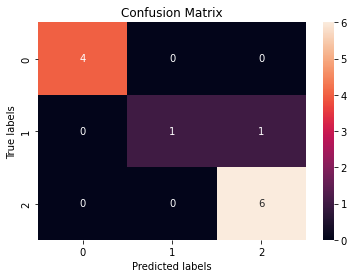

Accuracy : 0.9166666666666666


In [4245]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))

#### Result of 80/20

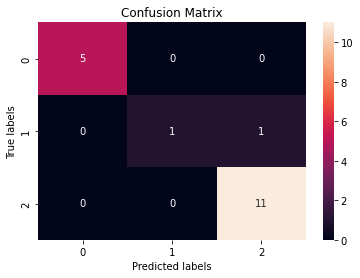

Accuracy: 0.9444444444444444


In [4246]:
array_cm1 = confusion_matrix(y_test1, y_pred1)
ax1 = plt.subplot()
sn.heatmap(array_cm1, annot=True, fmt='g', ax=ax1);  

# labels, title and ticks
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Confusion Matrix')
# ax1.xaxis.set_ticklabels(['Positive', 'Negative'])
# ax1.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()

print('Accuracy: ' + str(accuracy_score(y_test1, y_pred1)))

# Split Dataset 80/20

In [4247]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset)
y = dataset['Class']

In [4248]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=0)


# Supervised

## Logistic Regression

In [4249]:
import time
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
start = time.time()
model.fit(x_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
print(f"Model score: {model.score(x_test, y_test)}")

Training time: 0.009067058563232422s
Model score: 1.0


In [4250]:
from sklearn.decomposition import PCA

pca = PCA(.99)
x_pca = pca.fit_transform(dataset) 

print(f"Number of pca components: {pca.n_components_}")


Number of pca components: 3


In [4251]:
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state=0)

model_pca = LogisticRegression(max_iter=10000)
start = time.time()
model_pca.fit(x_train_pca, y_train)
stop = time.time()

print(f"Training time: {stop - start}s")
print(f"Model score: {model_pca.score(x_test_pca, y_test)}")

Training time: 0.015863895416259766s
Model score: 1.0


Highest training accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Highest testing accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Lowest testing accuracy: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


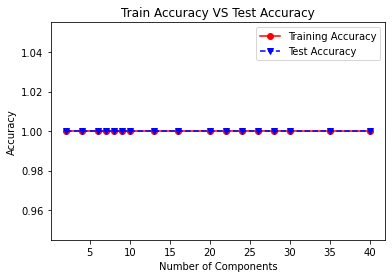

In [4252]:
from sklearn.metrics import accuracy_score
num_components = [2,4,6,7,8,9,10,13,16,20,22,24,26,28,30,35,40]

trainAccuracy = np.zeros(len(num_components))
testAccuracy = np.zeros(len(num_components))

index = 0
for compo in num_components:
    pca = PCA(compo)#n_components=20
    x_pca = pca.fit_transform(dataset)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state=0)
    model_pca = LogisticRegression(max_iter=20000,random_state=0)
    model_pca.fit(x_train_pca, y_train)
    
    Y_predTrain = model_pca.predict(x_train_pca)
    Y_predTest = model_pca.predict(x_test_pca)
    
    trainAccuracy[index] = accuracy_score(y_train, Y_predTrain)
    testAccuracy[index] = accuracy_score(y_test, Y_predTest)
    index += 1

# ###########################################################################
# # Plot training and test accuracies
# ##########################################################################
    
plt.plot(num_components,trainAccuracy,'ro-',num_components,testAccuracy,'bv--')
plt.title("Train Accuracy VS Test Accuracy")
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
print("Highest training accuracy:", trainAccuracy)
print("Highest testing accuracy:", testAccuracy)
print("Lowest testing accuracy:", testAccuracy)

Text(0, 0.5, 'Time to train')

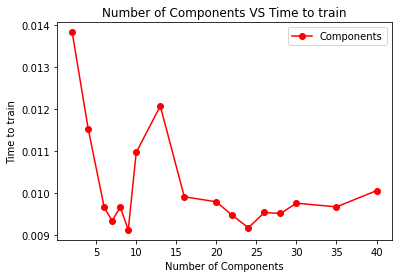

In [4253]:
num_components = [2,4,6,7,8,9,10,13,16,20,22,24,26,28,30,35,40]

timing = np.zeros(len(num_components))

index = 0
for compo in num_components:
    pca = PCA(compo)#n_components=20
    x_pca = pca.fit_transform(dataset)
    x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y, test_size = 0.2, random_state=0)
    model_pca = LogisticRegression(max_iter=20000,random_state=0)
    start = time.time()
    model_pca.fit(x_train_pca, y_train)
    stop = time.time()
    
    # print(stop - start)
    timing[index] = stop - start
    index += 1

# ###########################################################################
# # Plot training and test accuracies
# ##########################################################################
    
plt.plot(num_components,timing,'ro-')
plt.title("Number of Components VS Time to train")
plt.legend(['Components','Test Accuracy'])
plt.xlabel('Number of Components')
plt.ylabel('Time to train')

## KNN

In [4254]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

clf1 = KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2)
clf1.fit(x_train, y_train)

print (f"Model score: {clf1.score(x_test, y_test)}")

Model score: 0.8333333333333334


Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.5


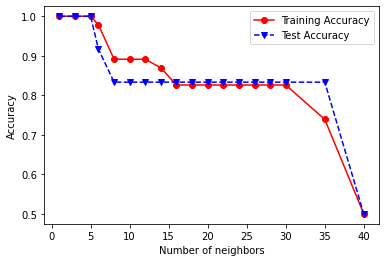

In [4255]:
numNeighbors = [1,3,5,6,8,10,12,14,16,18,20,22,24,26,28,30,35,40]#1, 5, 10, 15, 20, 25, 30
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf1 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf1.fit(x_train, y_train)
    Y_predTrain = clf1.predict(x_train)
    Y_predTest = clf1.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

## Neural Network

In [4256]:
from sklearn.neural_network import MLPClassifier
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
clf6.fit(x_train, y_train)

print (f"Model score: {clf6.score(x_test, y_test)}")


Model score: 1.0


Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.9166666666666666


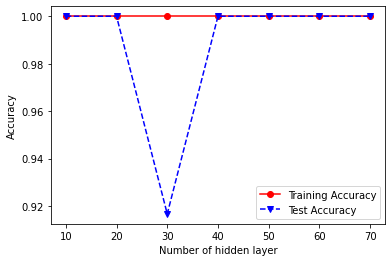

In [4257]:
from sklearn.neural_network import MLPClassifier

hidden_layer_sizes = [(10,10,10), (20,20,20), (30,30,30), (40,40,40), (50,50,50), (60,60,60), (70,70,70)]
trainAcc = []
testAcc = []

for k in hidden_layer_sizes:
    clf6 = MLPClassifier(solver='adam',hidden_layer_sizes=k, learning_rate='adaptive',random_state=0,max_iter=1000)
    clf6.fit(x_train, y_train)
    Y_predTrain = clf6.predict(x_train)
    Y_predTest = clf6.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))
hidden_layer_size=[x[0] for x in hidden_layer_sizes]
plt.plot(hidden_layer_size, trainAcc, 'ro-', hidden_layer_size, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of hidden layer')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(trainAcc))
print("Highest testing accuracy:", max(testAcc))
print("Lowest testing accuracy:", min(testAcc))

## SVM

Highest training accuracy: 1.0
Highest testing accuracy: 1.0
Lowest testing accuracy: 0.5


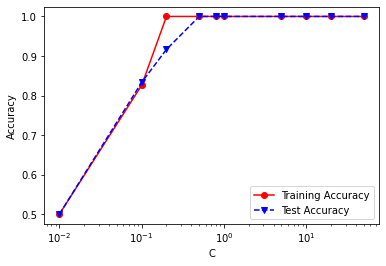

In [4258]:
from sklearn.svm import SVC

C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf5 = SVC(C=param,kernel='rbf',gamma='auto',random_state=0)
    clf5.fit(x_train, y_train)
    Y_predTrain = clf5.predict(x_train)
    Y_predTest = clf5.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('C')
plt.xscale('log')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(SVMtestAcc))
print("Highest testing accuracy:", max(SVMtestAcc))
print("Lowest testing accuracy:", min(SVMtestAcc))

## Decision Tree

In [4259]:
from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

clf7 = DecisionTreeClassifier(max_depth=10)
clf7.fit(x_train, y_train)

clf7.score(x_test, y_test)

1.0

Highest training accuracy: 1.0
Highest testing accuracy: 0.9166666666666666
Lowest testing accuracy: 0.5


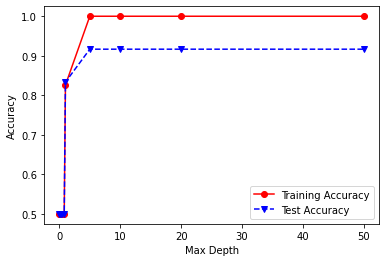

In [4260]:
maxdepth = [1,2,3,4,6,8,10,15,18,20,30,40]
dt_trainAcc = []
dt_testAcc = []

for param in C:
    clf7=DecisionTreeClassifier(max_depth=param, random_state=0)
    clf7.fit(x_train, y_train)
    Y_predTrain = clf7.predict(x_train)
    Y_predTest = clf7.predict(x_test)
    dt_trainAcc.append(accuracy_score(y_train, Y_predTrain))
    dt_testAcc.append(accuracy_score(y_test, Y_predTest))

plt.plot(C, dt_trainAcc, 'ro-', C, dt_testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
print("Highest training accuracy:", max(dt_trainAcc))
print("Highest testing accuracy:", max(dt_testAcc))
print("Lowest testing accuracy:", min(dt_testAcc))

In [4261]:
Y = df_remove_meterB['Class']
X = df_remove_meterB.drop(['Class'],axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=59)
clf = clf.fit(X, Y)

In [4262]:
X.columns

Index(['Profile factor', 'Symmetry', 'Crossflow', 'Swirl Angle',
       'Flow Velocity P1', 'Flow Velocity P2', 'Flow Velocity P3',
       'Flow Velocity P4', 'Average Flow Velocity', 'Speed of Sound P1',
       'Speed of Sound P2', 'Speed of Sound P3', 'Speed of Sound P4',
       'Average Speed of Sound', 'Signal Strength P1T', 'Signal Strength P1R',
       'Signal Strength P2T', 'Signal Strength P2R', 'Signal Strength P3T',
       'Signal Strength P3R', 'Signal Strength P4T', 'Signal Strength P4R',
       'Turbulence P1', 'Turbulence P2', 'Turbulence P3', 'Turbulence P4',
       'Meter Performance', 'Signal Quality P1T', 'Signal Quality P1R',
       'Signal Quality P2T', 'Signal Quality P2R', 'Signal Quality P3T',
       'Signal Quality P3R', 'Signal Quality P4T', 'Signal Quality P4R',
       'Gain P1T', 'Gain P1R', 'Gain P2T', 'Gain P2R', 'Gain P3T', 'Gain P3R',
       'Gain P4T', 'Gain P4R', 'Transit Time P1T', 'Transit Time P1R',
       'Transit Time P2T', 'Transit Time P2R', 'Tra

[Text(837.0, 906.0, 'Gain P3T <= 51.4\nentropy = 1.445\nsamples = 57\nvalue = [19, 9, 29]\nclass = 3'),
 Text(558.0, 543.6, 'Signal Strength P1T <= 4410.6\nentropy = 0.906\nsamples = 28\nvalue = [19, 9, 0]\nclass = 1'),
 Text(279.0, 181.19999999999993, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9, 0]\nclass = 2'),
 Text(837.0, 181.19999999999993, 'entropy = 0.0\nsamples = 19\nvalue = [19, 0, 0]\nclass = 1'),
 Text(1116.0, 543.6, 'entropy = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = 3')]

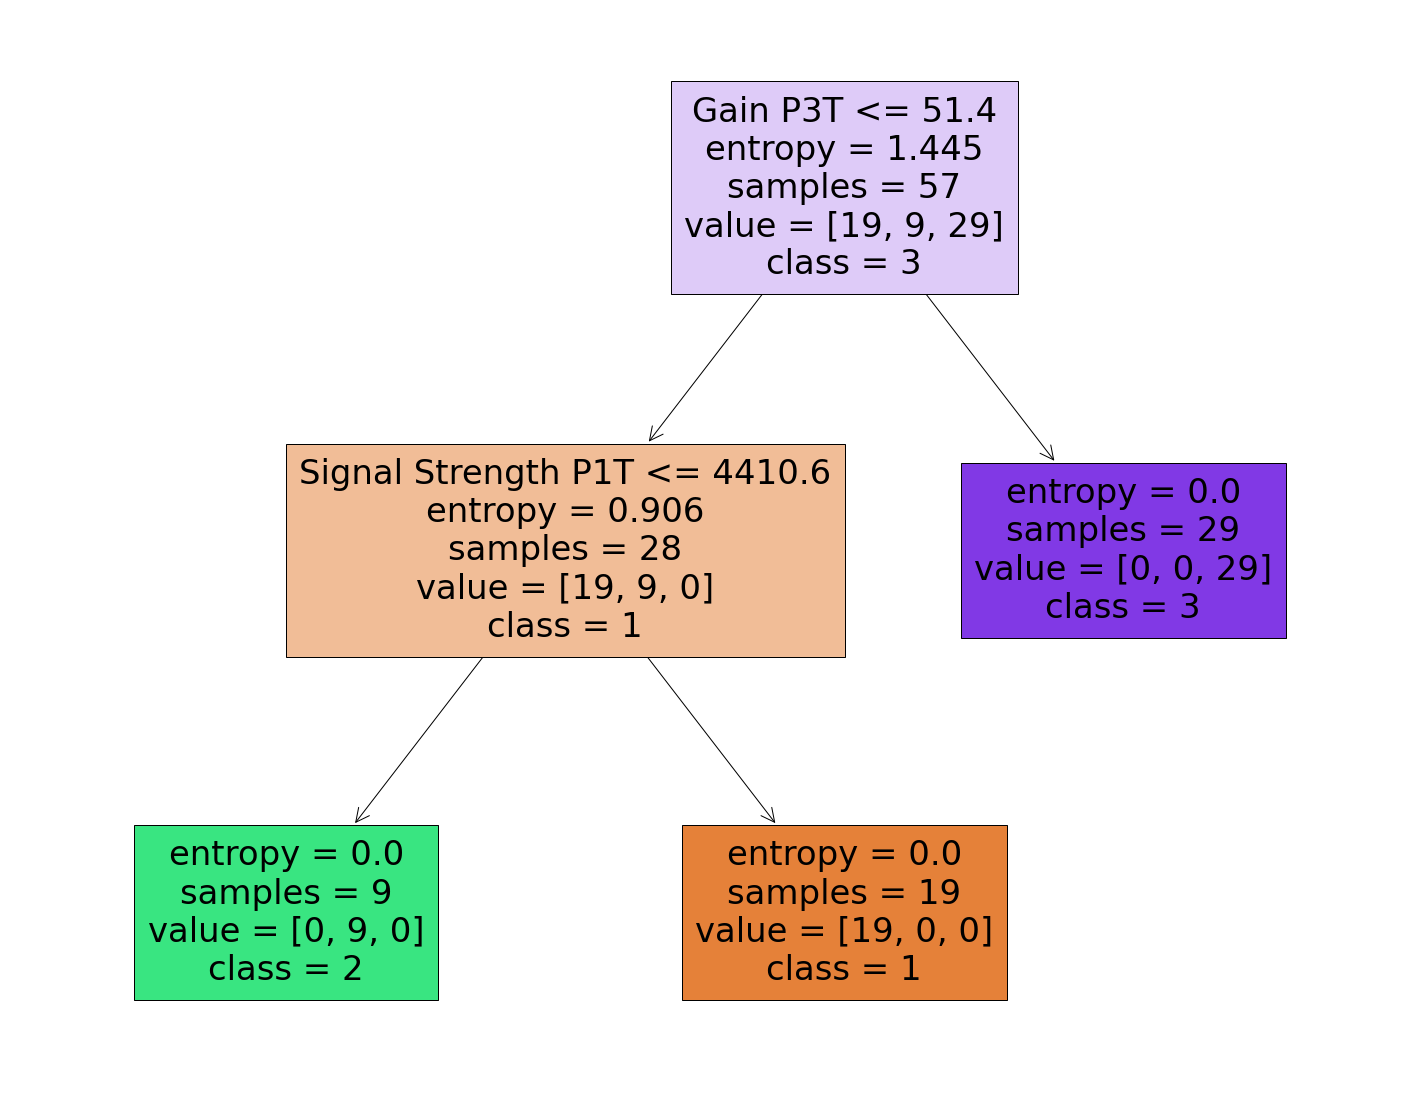

In [4263]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,feature_names=X.columns,class_names=['1','2','3','4'],filled=True, impurity=True)


## Random Forest

In [4264]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

/var/folders/7x/1p6my40n6kb5znc18rklfy9h0000gn/T/ipykernel_9286/155751855.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = dataset.drop('Class', 1)


In [4265]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4266]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [4267]:
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [4268]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

### Plot with confusion matrix
True Positive:

- Interpretation: You predicted positive and it’s true.


True Negative:

- Interpretation: You predicted negative and it’s true.


False Positive: (Type 1 Error)

- Interpretation: You predicted positive and it’s false.


False Negative: (Type 2 Error)

- Interpretation: You predicted negative and it’s false.


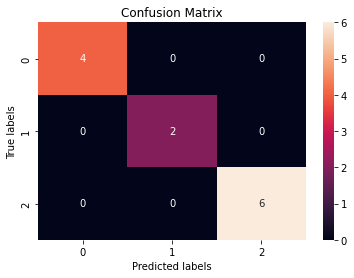

Accuracy: 1.0


In [4269]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn

array_cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
#annot=True to annotate cells, ftm='g' to disable scientific notation
sn.heatmap(array_cm, annot=True, fmt='g', ax=ax);  

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))